### 3.3. Решение линейного стока и его логарифмическая приближение

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.1 от 08.10.2023

Хабибуллин Ринат 2023 г.

---

Содержание
1. [Решение линейного стока в безразмерном виде. Использование symp](#331)
2. [Решение линейного стока в размерном виде. Использование sympy](#332)
3. [Логарифмическое приближение решения линейного стока ](#333)
4. [Задания для самостоятельной работы](#334)

In [1]:
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np

# matplotlib используем для построения графиков
import matplotlib.pyplot as plt

# scipy.special используем как альтернативный вариант расчета специальных функций
import scipy.special as sc

# sympy пакет для символьных вычислений
import sympy as sp

# 1. Решение линейного стока в безразмерном виде. Использование sympy <a class="anchor" id="331"></a>

Для решения уравнения фильтрации - линейного дифференциального уравнения в частных производных второго порядка необходимо задать начальные и граничные условия.
Самое простое решение можно получить для случая вертикальной скважины бесконечно малого радиуса запускающейся с постоянным дебитом. Условия соответствующие этому случаю можно выразить следующим образом

* начальное условие. До запуска скважины в момент времени  $t_D = 0$ давление в пласте равно начальному во всех точках $p=p_i$
$$ t_D < 0, p_D = 0 \tag{1}$$

* условие постоянства дебита на скважине - граничное условие на скважине
$$ \lim_{r_D \to 0} {r_D \frac{\partial p_D}{\partial r_D}} = -1  \tag{2}$$

* условие на бесконечном расстоянии возмущения от скважине нет
$$ r_D = \infty, p_D = 0  \tag{3}$$

В этом случае решение может быть выражено через функцию интегральной экспоненты
$$ p_D(r_D,t_D) = - \frac{1}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)  \tag{4}$$

где -Ei(-x) - интегральная показательная функция.


In [2]:
# объявим символьные переменные
r_d, p_d, t_d, gamma = sp.symbols('r_d p_d t_d gamma')
r, p, t, q, b, mu, phi, ct, k, h, p_i, s, r_w = sp.symbols('r p t q b mu phi ct k h p_i s r_w')

In [3]:
# зададим исходное уравнение
eq1 = sp.Eq(p_d, -1/2*sp.Ei(-r_d**2/4 / t_d))
eq1

Eq(p_d, -0.5*Ei(-r_d**2/(4*t_d)))

решение с интегральной экспонентой можно задать используя `scipy.special` или сгенерировать из решения `sympy`

In [4]:
# Решение линейного стока уравнения фильтрации
def pd_ei(td, rd):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    """
    return -1/2*sc.expi(-rd**2 / 4 / td)

In [5]:
pd_ei_ = sp.lambdify([t_d, r_d],eq1.rhs, modules=["scipy","numpy"]) 

сравним решения заданные явно и сгенерированные из решения `sympy`

In [6]:
print(pd_ei(1000,1))
print(pd_ei_(1000,1))
print(pd_ei(1000,1)==pd_ei_(1000,1))

3.8585419797881815
3.8585419797881815
True


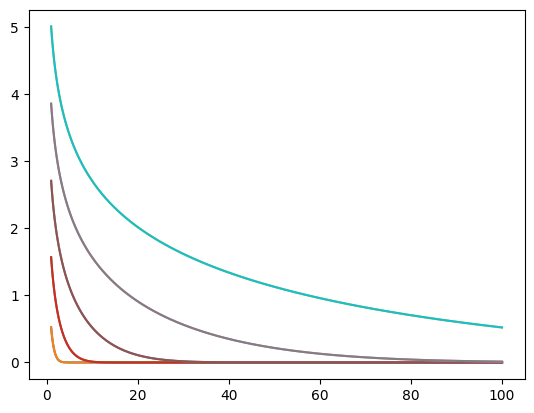

In [7]:
rd_arr = np.logspace(0,2,100)
for td in [1, 10, 100, 1000, 10000]:
    plt.plot(rd_arr, pd_ei_(td, rd_arr))
    plt.plot(rd_arr, pd_ei(td, rd_arr))

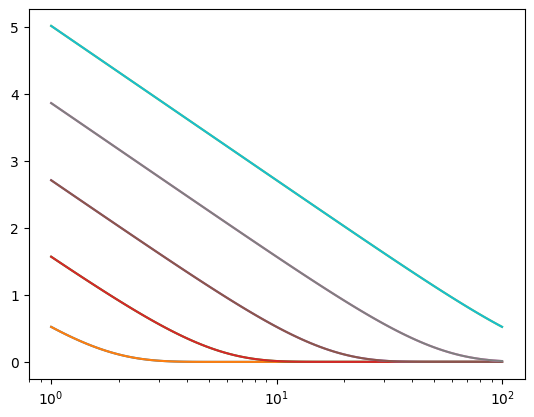

In [8]:
rd_arr = np.logspace(0,2,100)
for td in [1, 10, 100, 1000, 10000]:
    plt.plot(rd_arr, pd_ei_(td, rd_arr))
    plt.plot(rd_arr, pd_ei(td, rd_arr))
plt.xscale('log')

# 2. Решение линейного стока в размерном виде. Использование sympy <a class="anchor" id="332"></a>

Связь размерных и безразмерных переменных задается в виде

$$ r_D = \frac{r}{r_w} \tag{5} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}  \tag{6}$$
$$ p_D = \frac{kh}{ 18.41 q_s B \mu} \left( p_i - p \right)  \tag{7} $$

Здесь использование единицы измерения СИ.
* $r_w$ - радиус скважины, м
* $r$ - расстояние от центра скважины до точки в пласте, м
* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям м3/сут
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м3/м3
* $p_i$ - начальное давление в пласте, атм
* $p$ - давление на расстоянии $r$, атм
* $c_t$ - общая сжимаемость системы в пласте, 1/атм

In [9]:
# подставим вместо безразмерных переменных размерные
eq2 = eq1.subs(r_d, r/r_w)
eq2 = eq2.subs(t_d, 0.00036*k*t/(phi*mu*ct*r_w**2))
eq2 = eq2.subs(p_d, k*h/(18.41*q*b*mu)*(p_i-p))
# решим полученное уравнение относительно перепада давления
eq3 = sp.solve(eq2,p_i-p)
# выведем первое решение
eq3[0]

-9.205*b*mu*q*Ei(-694.444444444444*ct*mu*phi*r**2/(k*t))/(h*k)

Решение в размерных переменных можно записать как
$$
p\left(r,t\right)=p_i-\frac{18.41q_sB\mu}{kh}\left(-\frac{1}{2} Ei \left(-\frac{\varphi\mu c_tr^2}{0.00144kt}\right)\right) 
\tag{8}
$$



In [10]:
# проверим,что констранта под интегральной экспонентой одна и та же :)
print(1/0.00144)

694.4444444444445


In [11]:
# сгенерируем решение
pd_ei_full_ = sp.lambdify([t, r, k, h, mu, ct, phi, q, b, p_i],p_i-eq3[0], modules=["scipy","numpy"]) 

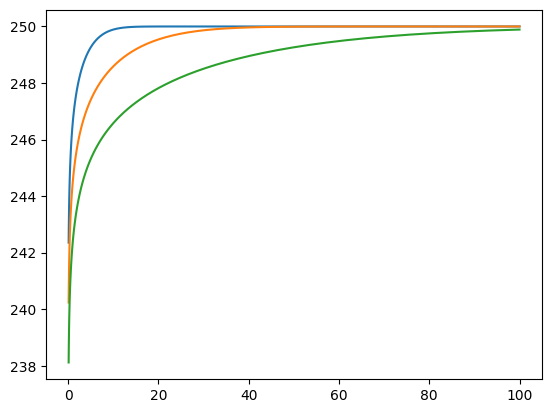

In [12]:
# нарисуем воронку депрессии используя сгенерированное решение
r_arr = np.logspace(-1,2,100)
for tt in [0.1, 1, 10]:
    plt.plot(r_arr, pd_ei_full_(tt, r_arr, k=10, h=10, mu=1, ct=1e-4, phi=0.2, q=10, b=1, p_i=250))

# 3. Логарифмическое приближение решения линейного стока <a class="anchor" id="333"></a>


Решение с интегральной экспонентой может быть заменено приблеженным решением с использованием логарифма 

$$ 
p_D(r_D,t_D) = - \frac{1}{2} \ln \left( \dfrac{ r_D^2}{4t_d} \right) - \frac{1}{2}\gamma 
\tag{9}
$$

где $\gamma = 0.57721566481$ - константа Эйлера

на графике от времени в полулогарифмических координатах логарифмическое приближение выглядит как кривая с наклоном $0.5$

упростим последнее выражение с использованием `sympy`

In [13]:
# зададим исходное уравнение
eq = sp.Eq(p_d, -1/2*sp.ln(r_d**2/4 / t_d) -1/2*gamma)

In [14]:
# объявим символьные переменные
r_d, p_d, t_d, gamma = sp.symbols('r_d p_d t_d gamma')
r, p, t, q, b, mu, phi, ct, k, h, p_i, s, r_w = sp.symbols('r p t q b mu phi ct k h p_i s r_w')

# зададим исходное уравнение
eq = sp.Eq(p_d, -1/2*sp.ln(r_d**2/4 / t_d) -1/2*gamma)

print('Исходное уравнение - логарифмическое приближение решения линейного стока')
display(eq)


Исходное уравнение - логарифмическое приближение решения линейного стока


Eq(p_d, -0.5*gamma - 0.5*log(r_d**2/(4*t_d)))

In [15]:
# подставим значение для gamma
eq = sp.simplify(sp.expand(eq.subs(gamma, 0.57721566)))
eq

Eq(p_d, 0.404539350559945 - 0.5*log(r_d**2/t_d))

In [16]:
pd_ei_ln_ = sp.lambdify([t_d, r_d],eq.rhs, modules=["scipy","numpy"]) 

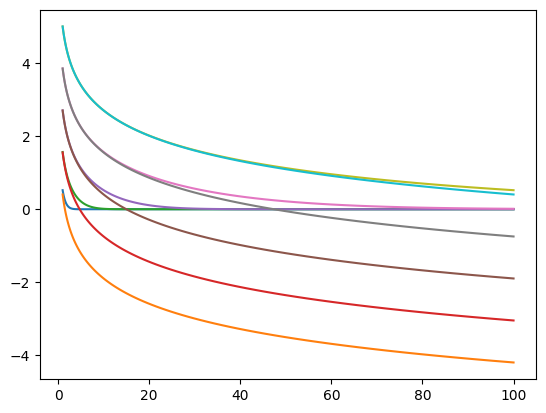

In [17]:
rd_arr = np.logspace(0,2,100)
for td_ in [1, 10, 100, 1000, 10000]:
    plt.plot(rd_arr, pd_ei_(td_, rd_arr))
    plt.plot(rd_arr, pd_ei_ln_(td_, rd_arr))

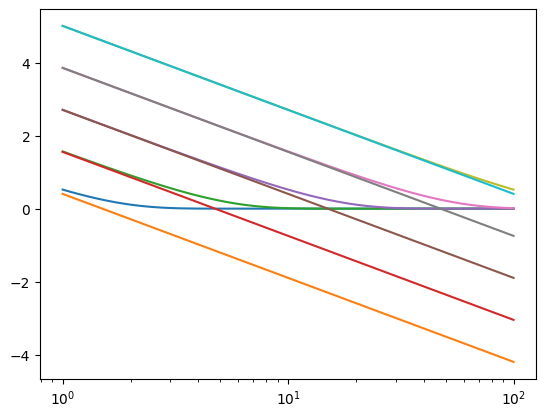

In [18]:
rd_arr = np.logspace(0,2,100)
for td_ in [1, 10, 100, 1000, 10000]:
    plt.plot(rd_arr, pd_ei_(td_, rd_arr))
    plt.plot(rd_arr, pd_ei_ln_(td_, rd_arr))
plt.xscale('log')

In [19]:
# подставим вместо безразмерных переменных размерные
eq = eq.subs(r_d, r/r_w)
eq = eq.subs(t_d, 0.00036*k*t/(phi*mu*ct*r_w**2))
eq = eq.subs(p_d, k*h/(18.41*q*b*mu)*(p_i-p))
# решим полученное уравнение относительно перепада давления
eq1 = sp.solve(eq,p_i-p)
# выведем первое решение
eq1[0]

9.205e-14*b*mu*q*(80907870111989.0 - 100000000000000.0*log(2777.77777777778*ct*mu*phi*r**2/(k*t)))/(h*k)

In [20]:
eq5 = sp.simplify(sp.expand(eq1[0]))
display(eq5)

b*mu*q*(-9.205*log(ct*mu*phi*r**2/(k*t)) - 65.5426176327539)/(h*k)

# 4 Задания для самостоятельной работы <a class="anchor" id="334"></a>

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте графики сравнение решения линейного стока и логарифмического приближения решения в размерных координатах
2. Постройте решение для линейного источника на плоскости проинтегрировав точечное решение по координате. Постройте поле давления для такого источника. Считайте дебит линейного источника известным.